In [223]:
# Pendefinisian fungsi dan kelas yang digunakan
# Import library keras dan lain-lain
import numpy as np # For matrix math
from numpy import loadtxt
from keras.models import Sequential
import matplotlib.pyplot as plt # For plotting
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Activation
from IPython.display import clear_output

In [224]:
# Fungsi normalisasi
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    hasil_normalisasi = (0.8 * (x - b))/(a - b) + 0.1
    return hasil_normalisasi

In [225]:
# Panggil Data Latih
# Data Prevelensi Stunting mulai Tahun 2020
# sampai dengan Tahun 2022
STT = loadtxt('plstunting.csv', delimiter=',')
STT_normal = normalisasi(STT)
STT_Target = STT[:, 4]
STT_Target_Uji = STT[:,5]

# DATA PELATIHAN =================================
# Data dibagi menjadi 4 variabel input (X) dan 1 variabel output (Y)
# Input : mulai tahun 2020 sampai tahun 2021

X = STT_normal[:,0:4]

# Output : data Stunting Jan-Jun 2022

Y = STT_normal[:,4]

# DATA UJI PREDIKSI=================================
# Geser enam bulan ke depan
# Input : mulai Jul 2020 sampai Juni 2022
# Untuk memprediksi Stunting Jul-Des 2022

X1 = STT_normal[:,1:5]

# Urut tahun, menggantikan indeks dari 0 s.d 5
urut = [1,2,3,4,5,6]

In [226]:
print(STT)

[[11.1 10.7 12.  10.3 13.6 11.6]
 [10.8 10.9 15.8 13.3 12.3 11.6]
 [ 8.5  9.2  8.1  9.   9.1  8.6]
 [10.  10.4  9.8  9.1 11.6  9.4]
 [ 7.9  8.5  7.4  8.5  8.   7.4]
 [ 7.4  6.8  6.8  7.3  7.1  6.9]]


In [227]:
STT_normal = normalisasi(STT)
print(STT_normal)

[[0.48222222 0.44666667 0.56222222 0.41111111 0.70444444 0.52666667]
 [0.45555556 0.46444444 0.9        0.67777778 0.58888889 0.52666667]
 [0.25111111 0.31333333 0.21555556 0.29555556 0.30444444 0.26      ]
 [0.38444444 0.42       0.36666667 0.30444444 0.52666667 0.33111111]
 [0.19777778 0.25111111 0.15333333 0.25111111 0.20666667 0.15333333]
 [0.15333333 0.1        0.1        0.14444444 0.12666667 0.10888889]]


In [228]:
baris, kolom = STT.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 6
kolomnya = 6


In [229]:
baris, kolom = STT_normal.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 6
kolomnya = 6


In [230]:
# Masukan Jaringan X
baris, kolom = X.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 6
kolomnya = 4


In [231]:
# Mendefinisikan model keras
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [232]:
# Proses kompilasi (pelatihan) Deep Learning
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [233]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

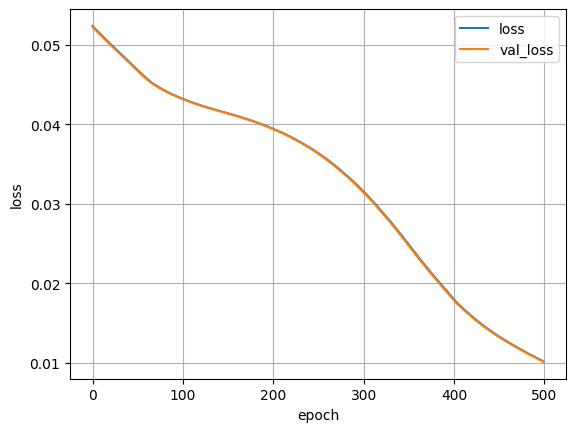

In [234]:
model.fit(X, Y,
          epochs=500,
          validation_data=(X, Y),
          callbacks=[plot_losses],
          verbose=0)

In [197]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(X, Y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.2f' % (MSE))

MSE : 0.00


In [198]:
# menjalankan fungsi prediksi
y_pred = model.predict(X)
print(y_pred)

[[0.61038   ]
 [0.6660429 ]
 [0.30896595]
 [0.5139361 ]
 [0.22931984]
 [0.12987652]]


In [199]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(STT)
b = np.min(STT)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_prediksi = (((y_pred - 0.1)*(a - b))/0.8) + b

print("y_prediksi =", y_prediksi)

y_prediksi = [[12.541775 ]
 [13.167982 ]
 [ 9.150867 ]
 [11.456781 ]
 [ 8.2548485]
 [ 7.1361113]]


In [200]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['Jan-22','Feb-22', 'Mar-22', 'Apr-22', 'Mei-22', 'Jun-22']

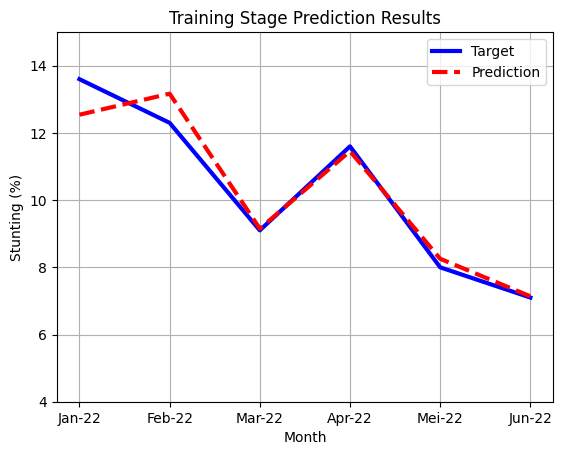

In [204]:
# Plot Keluaran Hasil Prediksi Tahap Pelatihan

plt.title('Training Stage Prediction Results')
plt.plot(urutan1, STT_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediction', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Month')
plt.ylabel('Stunting (%)')
plt.ylim((4,15))
plt.grid()

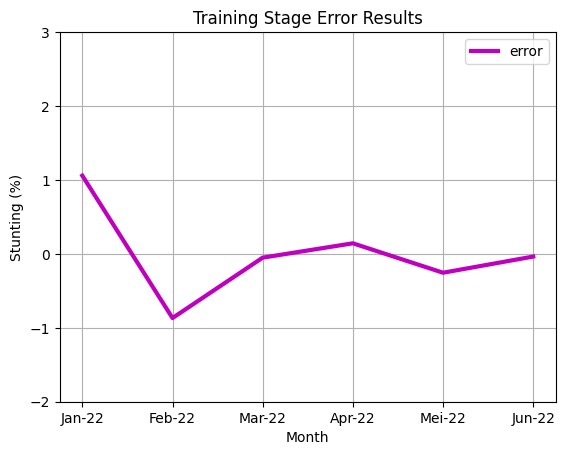

In [209]:
# Plot Kesalahan Prediksi

selisih = STT_Target - y_prediksi.transpose()
plt.title('Training Stage Error Results')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Month')
plt.ylabel('Stunting (%)')
plt.ylim((-2,3))
plt.grid()

In [211]:
# Pengukuran kinerja Deep Learning

from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(STT_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(TPT_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Percentage of Success =", Persentase_keberhasilan)

mse = 0.3270974082216037
rmse = 0.5719243028772284
MAPE = 25.775215449695022
Percentage of Success = 74.22478455030497


In [164]:
# Prediksi Stunting
# Tahap Pengujian
# Input mulai Jul 2020 - Jun 2022
# Untuk memprediksi Stunting di bulan July 2022 - December 2022

In [212]:
# Urut tahun, menggantikan indeks dari 0 s.d 5
urutan2 = ['Jul-22','Aug-22', 'Sep-22', 'Act-22', 'Nov-22', 'Dec-22']

In [213]:
# Ujicoba prediksi
y_uji = model.predict(X1)
print('Hasil prediksi sebelum denormalisasi =', y_uji)

Hasil prediksi sebelum denormalisasi = [[0.6369629 ]
 [0.8086677 ]
 [0.2707807 ]
 [0.43557602]
 [0.20238481]
 [0.13098261]]


In [215]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(TPT)
b = np.min(TPT)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_pengujian = (((y_uji - 0.1)*(a - b))/0.8) + b

print("y_pengujian =", y_pengujian)

y_pengujian = [[12.840833 ]
 [14.772512 ]
 [ 8.721283 ]
 [10.575231 ]
 [ 7.9518294]
 [ 7.1485543]]


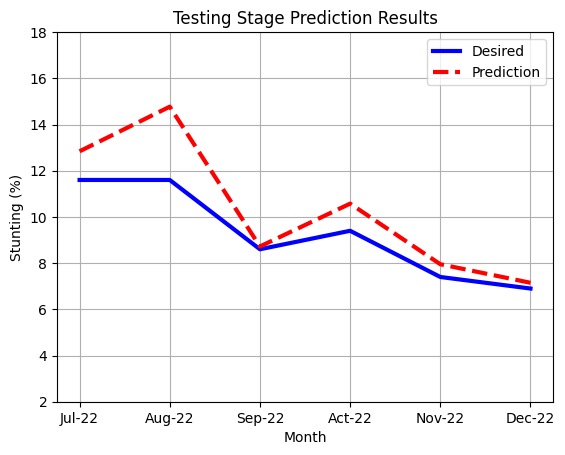

In [238]:
# Plot keluaran hasil prediksi Tahap Pengujian

plt.title('Testing Stage Prediction Results')
plt.plot(urutan2,  STT_Target_Uji, '-b', label='Desired',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediction', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Month')
plt.ylabel('Stunting (%)')
plt.ylim((2,18))
plt.grid()

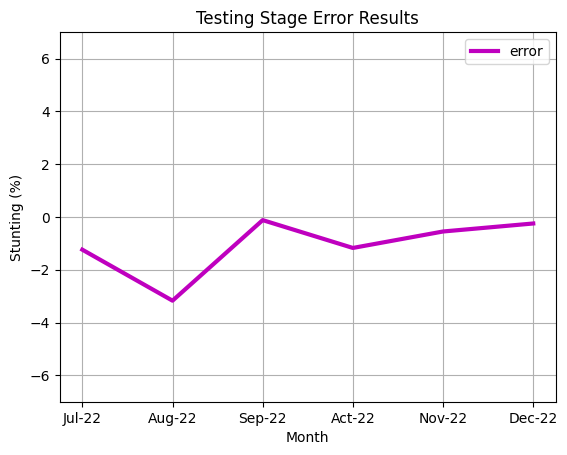

In [240]:
# Plot kesalahan prediksi Tahap Pengujian

selisih_pengujian = STT_Target_Uji - y_pengujian.transpose()
plt.title('Testing Stage Error Results')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend();
plt.xlabel('Month')
plt.ylabel('Stunting (%)')
plt.ylim((-7,7))
plt.grid()

In [241]:
# Pengukuran kinerja Deep Learning Tahap Pengujian

from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(STT_Target_Uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(TPT_Target_Uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Percentage of Success =", Persentase_keberhasilan)

mse = 2.2277787437836287
rmse = 1.492574535419799
MAPE = 32.191098377029874
Percentage of Success = 67.80890162297013
